<a href="https://colab.research.google.com/github/ar7ch/Control-Theory-Slides-Spring-2022/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 (5 points)

Given a system:

<!-- A = 
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one).


1.   Find its transfer function representation ($y(s) / u(s) = W(s)$).







We have system in the following form:
$$
\begin{cases}
    \dot{x} = Ax + Bu \\
    y = Cx 
\end{cases}
$$
Apply Laplace transform:
$$
\begin{cases}
    sx = Ax + Bu \\
    y = Cx + 0u 
\end{cases}
$$
Express x:
$$
(sI - A)x = Bu \\ 
x = (sI - A)^{-1}Bu \\ 
$$
Substitute to the second equation:
$$
y = C(sI - A)^{-1}Bu
$$
Since $y = W(s) \cdot u$
$$
W(s) = C(sI - A)^{-1}B
$$

In [17]:
import numpy as np
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, vpprint
init_vprinting()
n = symbols('n')
########
A = Matrix([[0,0,1,0],[0,0,0,1],[n,-2,-10/n,-2],[-5,-n/10,0,-3]])
B = Matrix([0,0,-1,1])
C = Matrix([1,1,0,0]).T
n0 = 10
########



x1,x2,x3,x4= dynamicsymbols('x1,x2,x3,x4')
u,t=symbols('u,t')


dx1=diff(x1,t)
dx2=diff(x2,t)
dx3=diff(x3,t)
dx4=diff(x4,t)
dX = Matrix([dx1,dx2,dx3,dx4])
X = Matrix([x1,x2,x3,x4])

pprint("Original system:")
display(Eq(dX, X))
display(Eq(dX, Mul(A,X)))
rightSide = A*X + B*u
leftSide = dX
display(Eq(dX, rightSide))
pprint("Substitute:")
rightSide = rightSide.subs(x3, dx1)
rightSide = rightSide.subs(x4, dx2)
leftSide = leftSide.subs(dx3, diff(dx1))
leftSide = leftSide.subs(dx4, diff(dx2))
display(Eq(leftSide, rightSide))
pprint("Thus, we obtain two equations:")
display(Eq(leftSide[2], rightSide[2]))
display(Eq(leftSide[3], rightSide[3]))
eq1 = rightSide[2] - leftSide[2]
eq2 = rightSide[3] - leftSide[3]

display(eq1)

pprint("Solve second equation for x1:")
eq2_solve_for_x1 = solve(eq2, x1)[0]
display(Eq(x1, eq2_solve_for_x1))
display(eq1)
pprint("Substitute x1 into first equation:")
pprint(" ")
eq = simplify(eq1.subs(x1, eq2_solve_for_x1))
display(eq)
eq = eq.subs(n, n0)
display(eq)
d4x2 = diff(dx2, t, 3)
eq_solve_for_d4x2 = solve(eq, d4x2)[0]
expr = Eq(d4x2, eq_solve_for_d4x2)
eq_solve_for_d4x2 -= d4x2
display(expr)
z, s, t = dynamicsymbols('z, s, t')
pprint("We obtain the following ODE:")
pprint(" ")
display(expr.subs(x2, z))

inverse_laplace_transform(eq_solve_for_d4x2, s, t)

Original system:


⎡x₁̇⎤   ⎡x₁⎤
⎢  ⎥   ⎢  ⎥
⎢x₂̇⎥   ⎢x₂⎥
⎢  ⎥ = ⎢  ⎥
⎢x₃̇⎥   ⎢x₃⎥
⎢  ⎥   ⎢  ⎥
⎣x₄̇⎦   ⎣x₄⎦

       ⎡            x₃            ⎤
       ⎢                          ⎥
⎡x₁̇⎤   ⎢            x₄            ⎥
⎢  ⎥   ⎢                          ⎥
⎢x₂̇⎥   ⎢                     10⋅x₃⎥
⎢  ⎥ = ⎢n⋅x₁ - 2⋅x₂ - 2⋅x₄ - ─────⎥
⎢x₃̇⎥   ⎢                       n  ⎥
⎢  ⎥   ⎢                          ⎥
⎣x₄̇⎦   ⎢     n⋅x₂                 ⎥
       ⎢   - ──── - 5⋅x₁ - 3⋅x₄   ⎥
       ⎣      10                  ⎦

       ⎡              x₃              ⎤
       ⎢                              ⎥
⎡x₁̇⎤   ⎢              x₄              ⎥
⎢  ⎥   ⎢                              ⎥
⎢x₂̇⎥   ⎢                         10⋅x₃⎥
⎢  ⎥ = ⎢n⋅x₁ - u - 2⋅x₂ - 2⋅x₄ - ─────⎥
⎢x₃̇⎥   ⎢                           n  ⎥
⎢  ⎥   ⎢                              ⎥
⎣x₄̇⎦   ⎢     n⋅x₂                     ⎥
       ⎢   - ──── + u - 5⋅x₁ - 3⋅x₄   ⎥
       ⎣      10                      ⎦

Substitute:


       ⎡              x₁̇              ⎤
       ⎢                              ⎥
⎡x₁̇⎤   ⎢              x₂̇              ⎥
⎢  ⎥   ⎢                              ⎥
⎢x₂̇⎥   ⎢                         10⋅x₁̇⎥
⎢  ⎥ = ⎢n⋅x₁ - u - 2⋅x₂ - 2⋅x₂̇ - ─────⎥
⎢x₁̈⎥   ⎢                           n  ⎥
⎢  ⎥   ⎢                              ⎥
⎣x₂̈⎦   ⎢     n⋅x₂                     ⎥
       ⎢   - ──── + u - 5⋅x₁ - 3⋅x₂̇   ⎥
       ⎣      10                      ⎦

Thus, we obtain two equations:


Solve second equation for x1:


Substitute x1 into first equation:
 


We obtain the following ODE:
 


$$\displaystyle \ddddot{z} = - 5 u + 20 z + 39 \dot{z} + 6 \ddot{z} - 4 \dddot{z}$$

Transfer function:


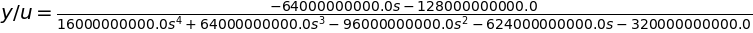

In [18]:
import numpy as np
from sympy import *
#from sympy.physics.mechanics import *
from IPython.display import display

init_printing()

n=10
s, x, y, u, t = symbols('s, x, y, u, t')

A = Matrix([[0,0,1,0],
     [0,0,0,1],
     [n,-2,-10/n,-2],
     [-5,-n/10,0,-3]])
B = Matrix([0, 0, -1, 1])
C = Matrix([1, 1, 0, 0]).T

I = eye(4);
_X = (s*I - A).inv() @ B
W = simplify(C @ _X)[0]

u, x, y = symbols('u, x, y')
pprint("Transfer function:")
display(Eq(y/u, W))

2.   Propose an ODE representation of the system.
Let us represent the expression above as follows.

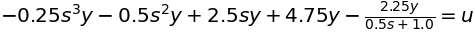

In [19]:
fr_pr = apart(1/W)
display(Eq(expand(y*fr_pr), u))



3.   Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.


In [77]:
from scipy.signal import place_poles

k1,k2,k3,k4 = symbols('k1,k2,k3,k4', real=true)
K = np.array([[k1,k2,k3,k4]])
u = -K @ X
A_c = A - B@K
l = symbols('x')
pole_equation = simplify((A_c - l*eye(4)).det())
poles = [-1, -1.5, -0.4, -1.2]

display(collect(pole_equation, l))
pp = place_poles(np.array(A, dtype=float),np.array(B, dtype=float),np.array(poles))    
K_s = pp.gain_matrix[0]
K = K[0]
for i in range(4):
    A_c = A_c.subs(K[i], K_s[i])
display(A_c)
ei,v = list(
            np.linalg.eig( 
                            np.array(A_c, dtype=float)
                         ))
for e in ei:
    display(e.real)

⎡       0                  0                   1                  0        ⎤
⎢                                                                          ⎥
⎢       0                  0                   0                  1        ⎥
⎢                                                                          ⎥
⎢3.66833333333327  -2.34499999999997   -2.47333333333333  -3.37333333333329⎥
⎢                                                                          ⎥
⎣1.33166666666673  -0.655000000000032  1.47333333333333   -1.62666666666671⎦

4.   Show stability of the closed-loop system via eigenvalue analysis.

In [89]:
ei, v = np.linalg.eig(np.array(A, dtype=float))
pprint("Eigenvalues of matrix A:")
stability = ["asymptotically stable", "marginally stable", "unstable"]
stab_status = 0;
eps = 1e-15
for e in ei:
    er = e.real
    msg = ""
    if -eps < er - 0 < eps:
        if(stab_status != 2):
            stab_status = 1
    elif er > 0:
        stab_status = 2
        msg = "       <- positive eigenvalue: the system is unstable"
    pprint(f"{er}{msg}")
pprint(f"The system is {stability[stab_status]}, need to apply stabilizing control")

Eigenvalues of matrix A:
3.01406620809477       <- positive eigenvalue: the system is unstable
-3.215891133863984
-3.215891133863984
-0.5822839403667993
The system is unstable, need to apply stabilizing control


5.   Find stability margins by analysing Bode diagram for the system.

In [ ]:
from scipy import odeint


def PeriodicControlSignal(t, w):
    """
        Input control function u(t) = sin(wt)
        :return: value of u(t) at given t
    """
    sig = np.sin(w*t)
    return np.array([sig])

def StateSpace(x, t, A, B, w):
    """
        State-space representation of the system.
        :return: parameters of the system described by state and input matrices A and B, assuming that input signal is periodic with freq w, 
                 with given state x at given time w
    """
    u = PeriodicControlSignal(t, w)
    return A@x + B@u

def ControlSystem(A, B, C, D, w):
    """

    """
    x0 = np.zeros(4) # initial conditions for the system

    t0 = 0; tf = 30
    t = np.linspace(t0, tf, 1000)

    solution = odeint()


1.   Find stability margins by analysing Bode diagram for the system.
1.   Simulate closed-loop system.
1.   Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix} 
(2+0.1n)/(n-5) \\
1 \\
0 \\
0 
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.
1. Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dinamics.
1. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).
1. Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law. Demonstrate stability.
1. Simulate the discrete system. Show graphs.
1. Find Lyapunov function that proves the system's stability (one for continious time and one discrete time versions).



# Task 2 (4 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
1 & 5 & -2 \\
2 & 1 & -3 \\
-1 & -2 & 7
\end{bmatrix}
x
+ 
\begin{bmatrix} 
2 \\
1 \\
0
\end{bmatrix}
u \\
u = -\begin{bmatrix} 
7k & 6k & -50k
\end{bmatrix} x
\end{cases}
$$

1. How do the eigenvalues of the closed-loop system depend on k? Plot the evolution of the eigenvalues on a complex plane, as $k$ changes from 0 to 5. 
1. Chose a value of $k$ that allows the system to be stable. USe bode plot to find stability margins of teh closed-loop system.
1. Discretize the closed-loop system with $\Delta t = 0.05$ and simulate both the continues-time and discrete-time versions, show if there is a difference between simulation results.
1. What is the smallest value of $k$ that makes the eigenvalues purely real?

# Task 3 (3 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1 & 10
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
1
\end{bmatrix}
u \\
u = 
-\begin{bmatrix} 
5k & k
\end{bmatrix} x
\end{cases}
$$

You can chose any positive value of $k$ to design your controller. What is least-norm control gain (control gain is the matrix $\begin{bmatrix} 
5k & k
\end{bmatrix}$) that makes the system not only be stable, but also exhibit no oscillations in the transient process?